In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# Ignoring ununnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Load the Dataset
df = pd.read_csv('twitter.csv')

In [ ]:
# Rename columns for clarity
df.columns = ['id', 'entity', 'sentiment', 'text']

In [ ]:
df.head()

,id,entity,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df.shape

(74681, 4)

In [ ]:
#check for null values
df.isnull().sum()

,0
id,0
entity,0
sentiment,0
text,686


In [ ]:
#drop null values
df.drop(['id'], axis=1, inplace=True)
df.dropna(inplace=True)

In [ ]:
#check for duplicate values
df.duplicated().sum()

3039

In [ ]:
#drop duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
df['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [ ]:
# Preprocess Text
def preprocess_text(text):
    # Remove punctuations, special symbols, and special characters
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

In [ ]:
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [ ]:
# Drop rows with empty text after preprocessing
df = df[df['cleaned_text'].str.strip() != '']

# Check for missing values in sentiment column
print("Null values in sentiment column:", df['sentiment'].isnull().sum())
print("Null values in text column:",df['text'].isnull().sum())

Null values in sentiment column: 0
Null values in text column: 0


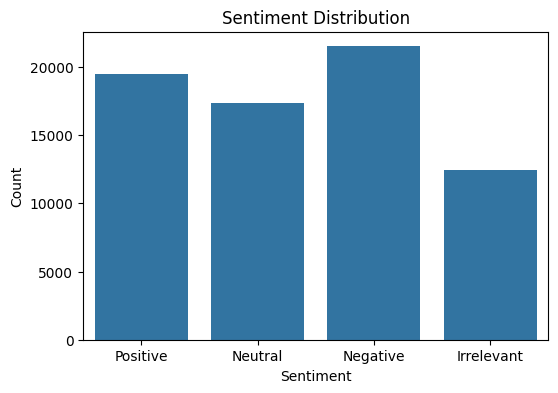

In [ ]:
# Visualize Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

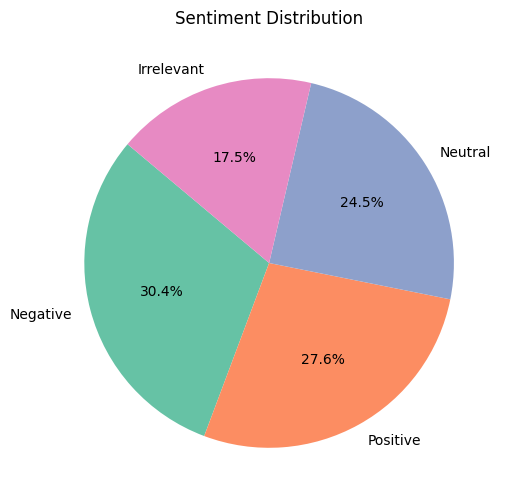

In [ ]:
# Calculate the counts for each sentiment
sentiment_counts = df['sentiment'].value_counts()
palette = sns.color_palette('Set2', n_colors=len(sentiment_counts))
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=palette)
plt.title('Sentiment Distribution')
plt.show()

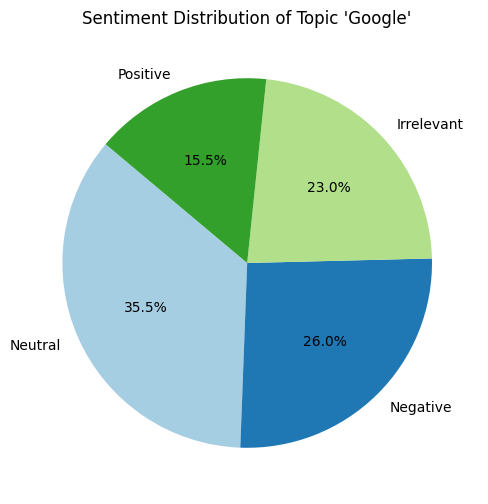

In [ ]:
#Sentiment Distribution for the Topic "Google"
google_data = df[df['entity'] == 'Google']
sentiment_counts = google_data['sentiment'].value_counts()
palette = sns.color_palette('Paired', n_colors=len(sentiment_counts))
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=palette)
plt.title("Sentiment Distribution of Topic 'Google'")
plt.show()

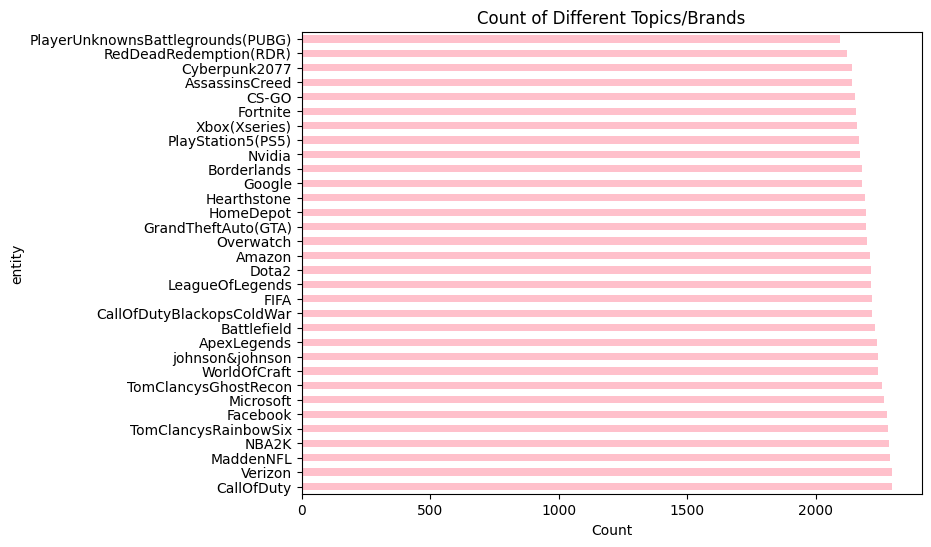

In [ ]:
#visualization of count of different topics
plt.figure(figsize=(8,6))
df['entity'].value_counts().plot(kind='barh',color='pink')
plt.title("Count of Different Topics/Brands")
plt.xlabel("Count")
plt.show()

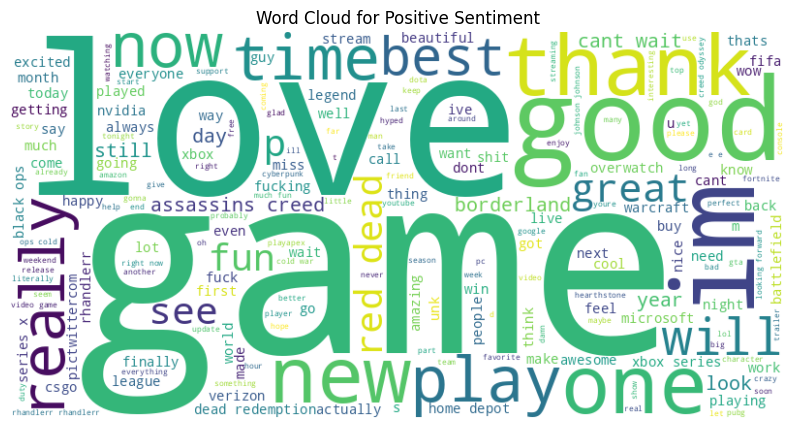

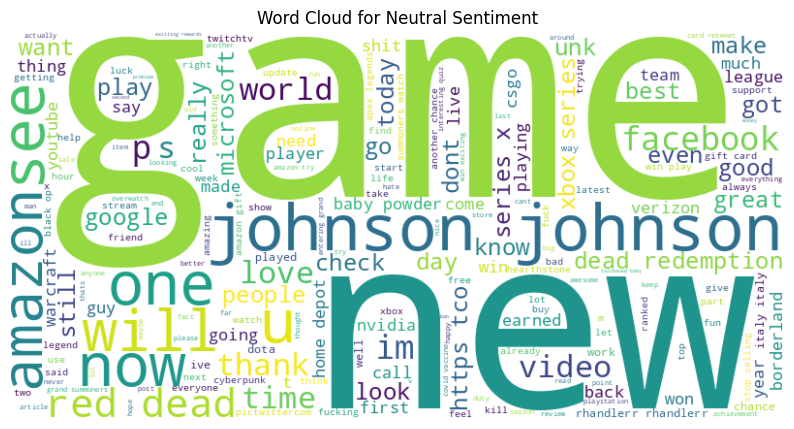

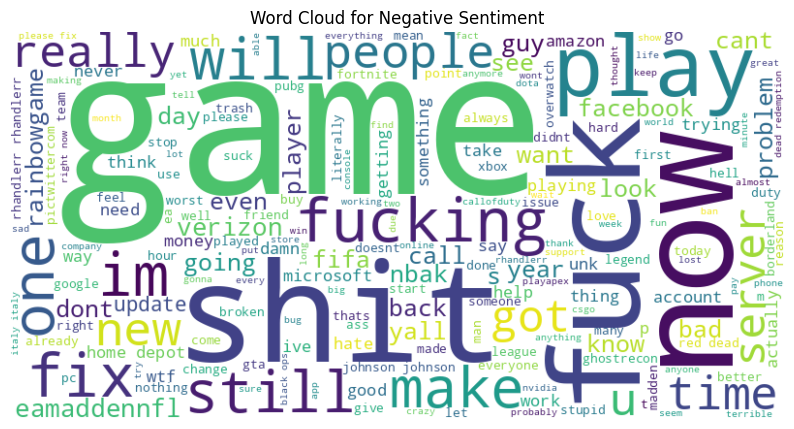

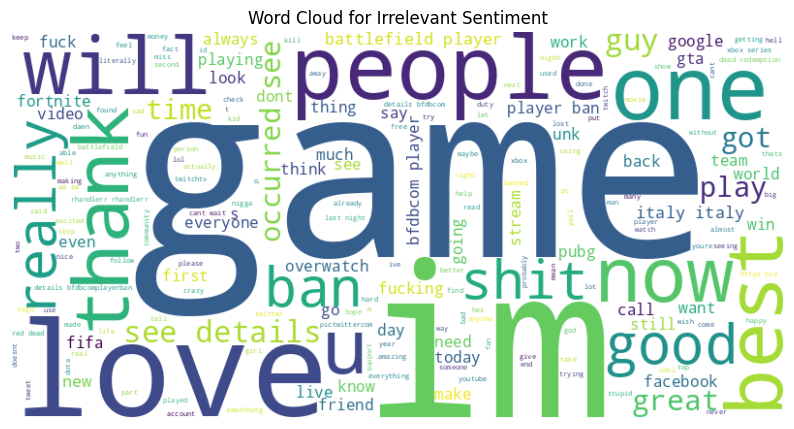

In [ ]:
# Word Cloud for Each Sentiment
sentiments = df['sentiment'].unique()

for sentiment in sentiments:
    text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

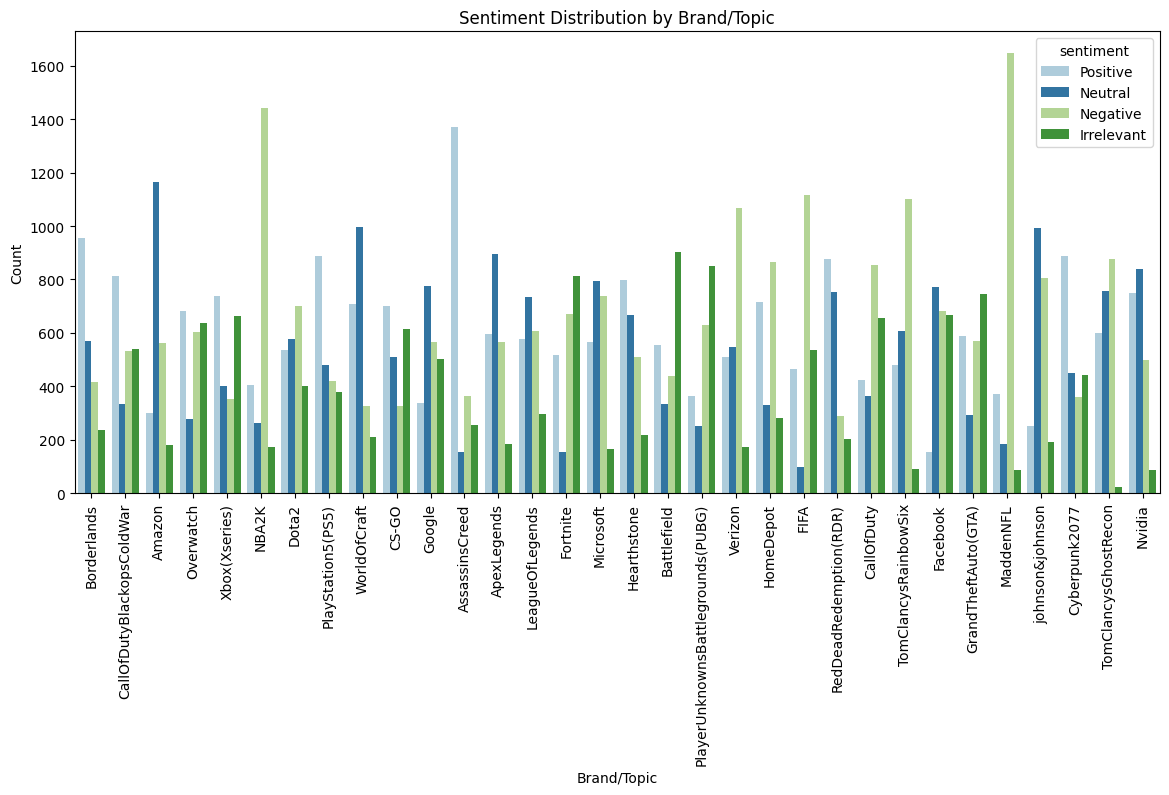

In [ ]:
# Topic/Brand Analysis
if 'entity' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.countplot(data=df, x='entity', hue='sentiment', palette='Paired')
    plt.title('Sentiment Distribution by Brand/Topic')
    plt.xlabel('Brand/Topic')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

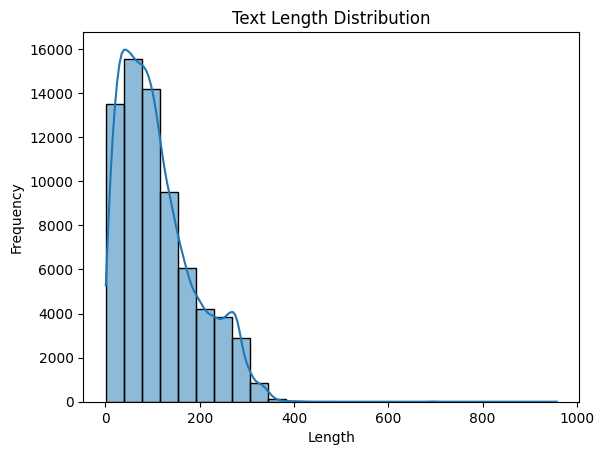

In [ ]:
#Plot of text length distribution for data
df['text_length'] = df['text'].str.len()
sns.histplot(df['text_length'], bins=25,kde=True)
plt.title('Text Length Distribution')
plt.ylabel('Frequency')
plt.xlabel('Length')
plt.show()

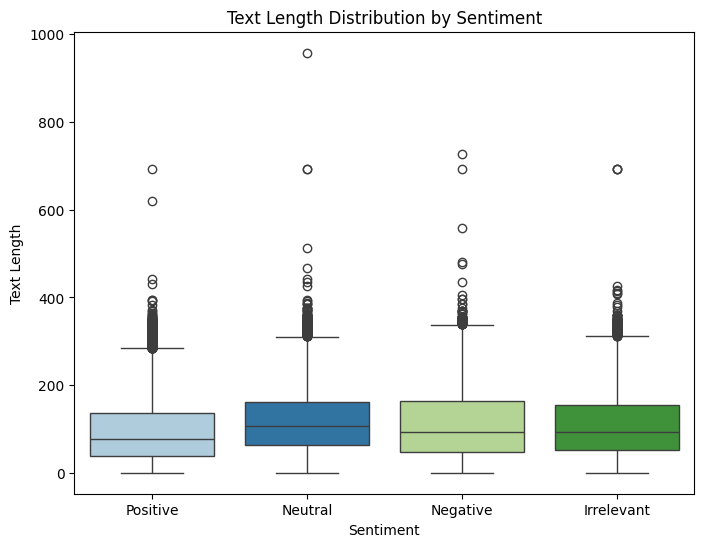

In [ ]:
# Sentiment Analysis by Length of Text
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sentiment', y='text_length', palette='Paired')
plt.title('Text Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()

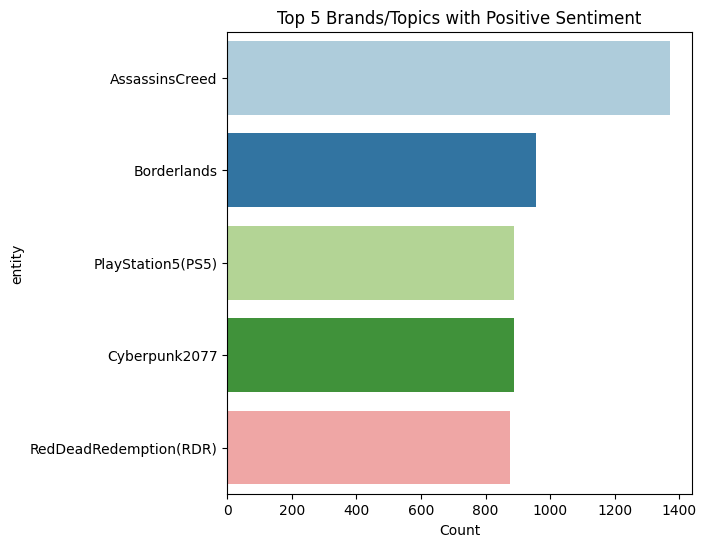

In [ ]:
# Top 5 brands/topics with positive sentiment
positive_df = df[df['sentiment'] == 'Positive']
topic_counts = positive_df['entity'].value_counts()
top_5_entities = topic_counts.head(5)

palette = sns.color_palette('Paired', n_colors=len(top_5_entities))
plt.figure(figsize=(6, 6))
sns.barplot(x=top_5_entities.values, y=top_5_entities.index, palette=palette)
plt.xlabel("Count")
plt.title("Top 5 Brands/Topics with Positive Sentiment")
plt.show()

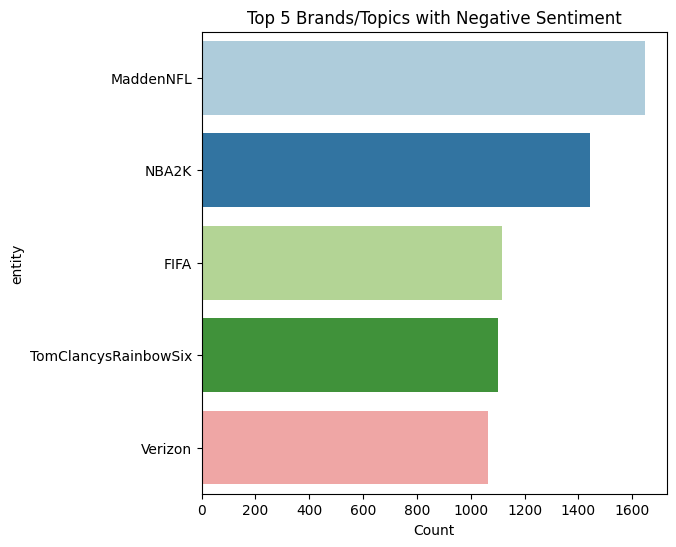

In [ ]:
# Top 5 brands/topics with negative sentiment
positive_df = df[df['sentiment'] == 'Negative']
topic_counts = positive_df['entity'].value_counts()
top_5_entities = topic_counts.head(5)

palette = sns.color_palette('Paired', n_colors=len(top_5_entities))
plt.figure(figsize=(6, 6))
sns.barplot(x=top_5_entities.values, y=top_5_entities.index, palette=palette)
plt.xlabel("Count")
plt.title("Top 5 Brands/Topics with Negative Sentiment")
plt.show()

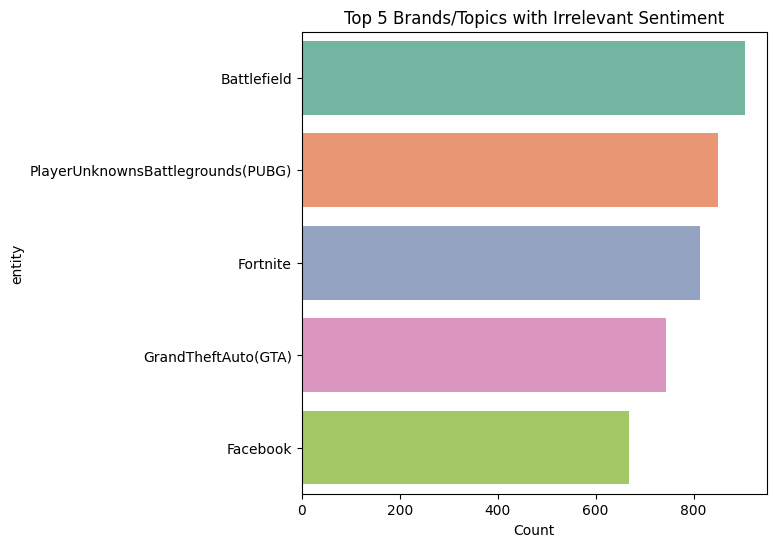

In [ ]:
# Top 5 brands/topics with irrevalant sentiment
positive_df = df[df['sentiment'] == 'Irrelevant']
topic_counts = positive_df['entity'].value_counts()
top_5_entities = topic_counts.head(5)

palette = sns.color_palette('Set2', n_colors=len(top_5_entities))
plt.figure(figsize=(6, 6))
sns.barplot(x=top_5_entities.values, y=top_5_entities.index, palette=palette)
plt.xlabel("Count")
plt.title("Top 5 Brands/Topics with Irrelevant Sentiment")
plt.show()

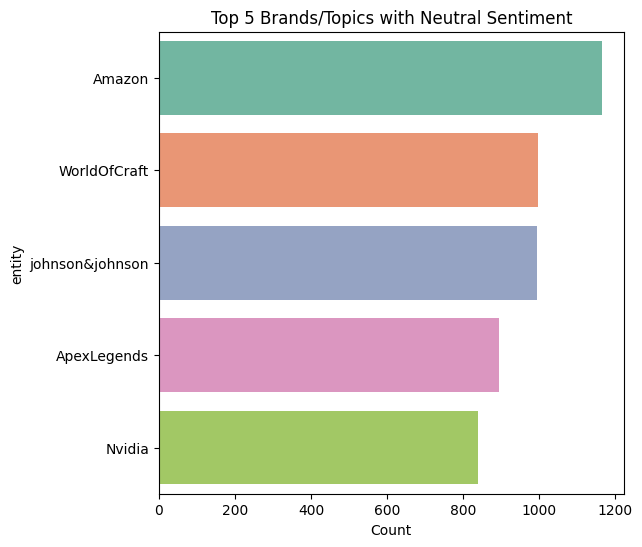

In [ ]:
# Top 5 brands/topics with neutral sentiment
positive_df = df[df['sentiment'] == 'Neutral']
topic_counts = positive_df['entity'].value_counts()
top_5_entities = topic_counts.head(5)

palette = sns.color_palette('Set2', n_colors=len(top_5_entities))
plt.figure(figsize=(6, 6))
sns.barplot(x=top_5_entities.values, y=top_5_entities.index, palette=palette)
plt.xlabel("Count")
plt.title("Top 5 Brands/Topics with Neutral Sentiment")
plt.show()

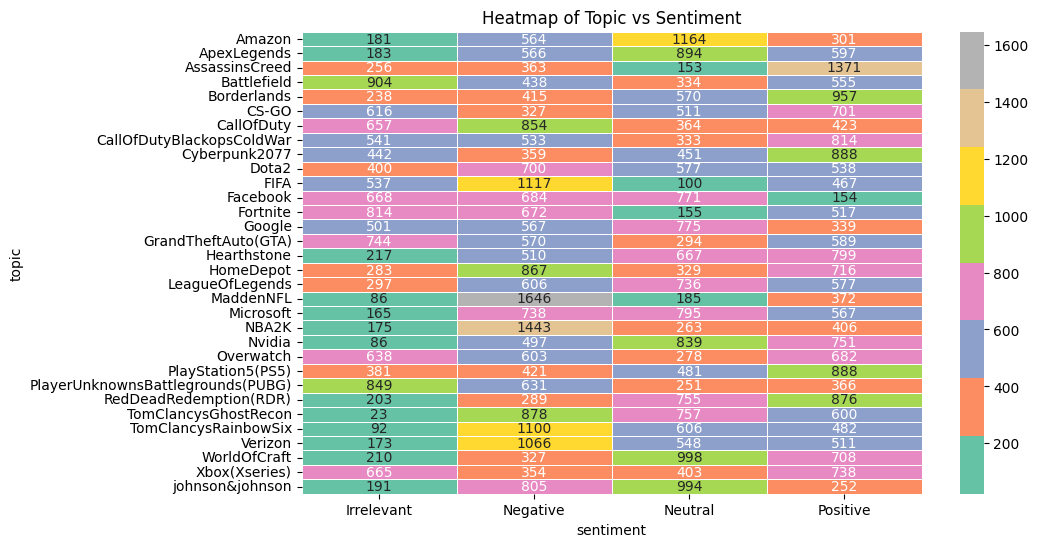

In [ ]:
#Visualizing Topic vs. Sentiment with a Heatmap
crosstab = pd.crosstab(index=df['entity'], columns=df['sentiment'])
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, cmap='Set2', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('sentiment')
plt.ylabel('topic')
plt.show()